In [1]:
input_dim = 13
num_clusters = 9
num_classes = 2

model_file = "/home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt"

import csv
import json
import numpy as np
import os
import pandas as pd


import sys
sys.path.insert(0, "../Code/")
from explain_cs import explain
from load_scvis import load_vae
from metrics import metrics, eval_epsilon
from myplot import plot_polys, plot_groups, plot_metrics, plot_explanation
from misc import poly2labels

def load_model(input_dim = input_dim, model_file = model_file):
    return load_vae(input_dim, model_file)


In [2]:
# Load Data & Configuration

x = pd.read_csv("../Heart/Data/X_corrupted.tsv", sep="\t").values

labels = pd.read_csv("../Heart/Data/labels_corrupted.tsv", sep="\t").values


In [3]:
# Calculate Data Representation

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


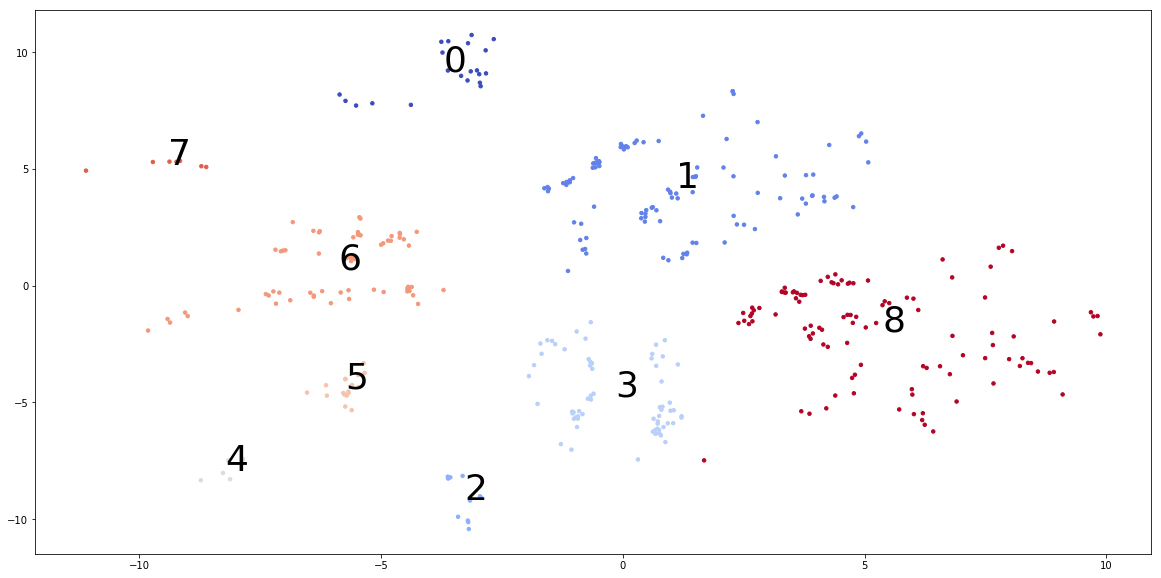

In [4]:
# Visualize the clusters in the learned representation

means, centers, indices = plot_groups(x, data_rep, num_clusters, labels, name = "heart-corrupted-rep.png")


In [5]:
# Set epsilon for our metrics

epsilon = 1.0

if True:
    eval_epsilon(load_model, x, indices, epsilon)


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


In [6]:
# Compute the group explanations

best_val = 0.0
for i in range(5):
    deltas = explain(load_model, means, centers, learning_rate = 0.01, consecutive_steps = 5, lambda_global = 2.0)
    a, b = metrics(load_model, x, indices, deltas, epsilon)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        np.save("deltas.npy", deltas)
    
    os.system("rm -rf explanation")

                    

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0

INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


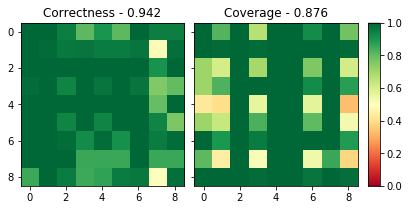

In [7]:
# Evaluate the explanations

deltas = np.load("deltas.npy")

a, b = metrics(load_model, x, indices, deltas, epsilon)

plot_metrics(a, b, name = "heart-corrupted-metrics.png")


INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /home/gregory/Desktop/ELDR/Heart-corrupted/Model/model/perplexity_10_regularizer_0.001_batch_size_409_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


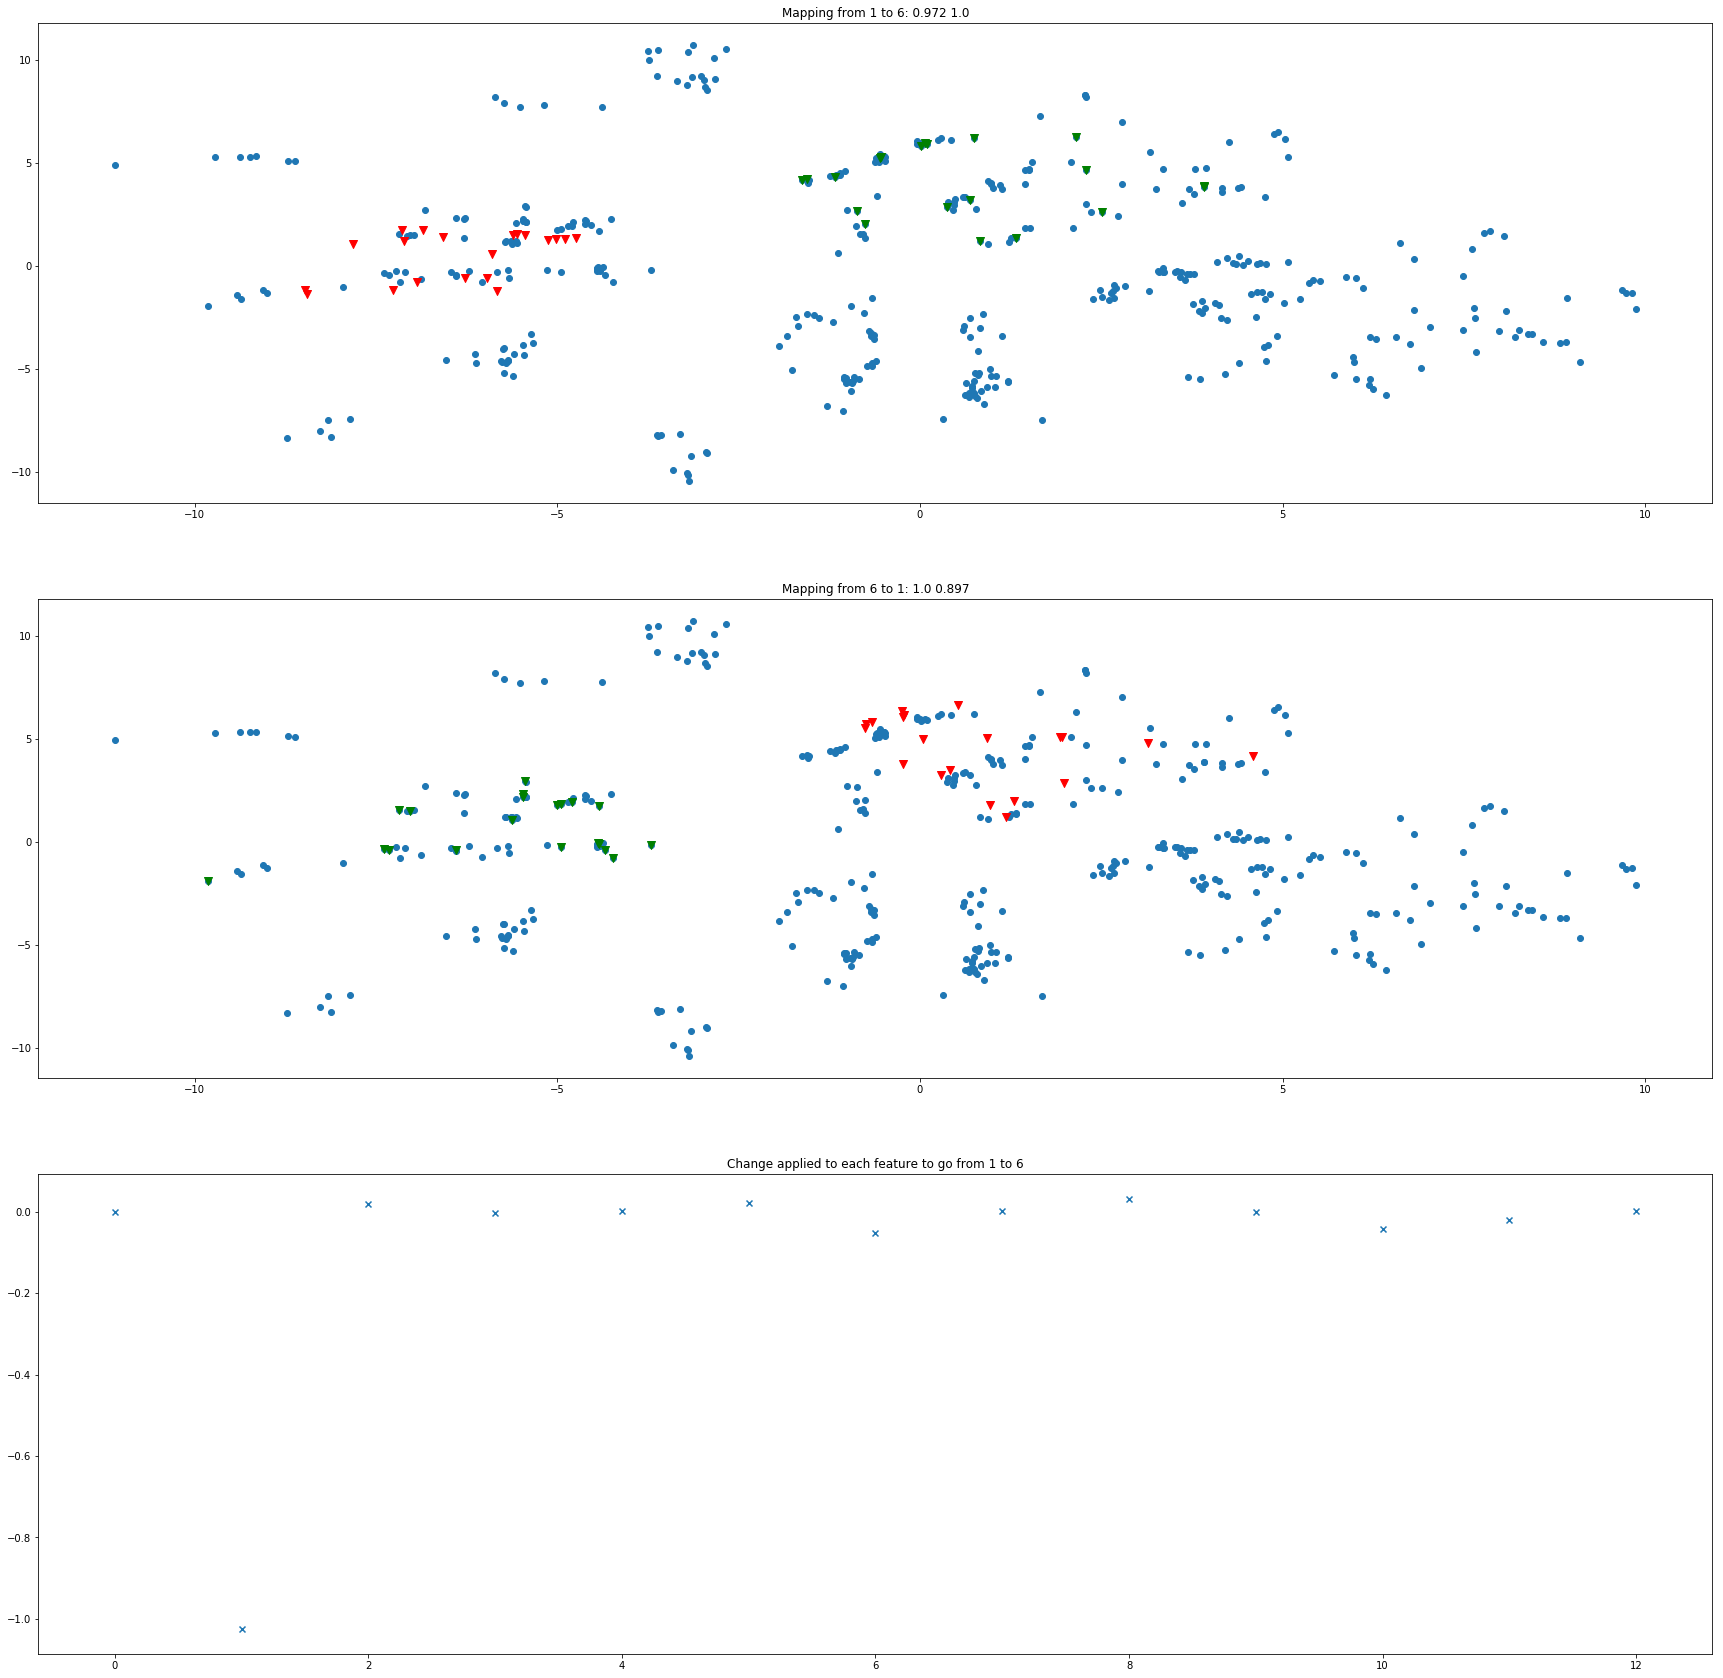

In [8]:
# Visualize the group explanations


plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 1, 8, name = "heart-t2c.png", num_points = 20)


[[-0.   -0.02 -0.09  0.    0.   -0.96 -0.01  0.    0.06 -0.    0.09 -0.01
  -0.  ]
 [-0.01 -0.02 -0.26 -0.    0.   -0.01 -0.01 -0.01  1.    0.   -0.21  0.03
   0.  ]
 [ 0.    0.02 -0.37 -0.   -0.   -0.93 -0.02  0.    1.06  0.   -0.04 -0.
  -0.01]
 [ 0.01 -0.96 -0.39 -0.   -0.    0.04 -0.07  0.    1.01  0.   -0.15 -0.02
  -0.01]
 [ 0.   -0.96 -0.33 -0.   -0.   -0.96 -0.01  0.    0.99 -0.   -0.01 -0.01
  -0.  ]
 [-0.   -1.01 -0.15 -0.   -0.   -0.97 -0.    0.   -0.01 -0.    0.1  -0.02
   0.  ]
 [-0.   -0.98 -0.01  0.    0.    0.01  0.   -0.   -0.04 -0.    0.15 -0.01
  -0.  ]]
[[ 0.    0.05 -0.11  0.   -0.   -1.01  0.04  0.   -0.07 -0.    0.09 -0.
  -0.  ]
 [-0.    0.04 -0.3   0.   -0.    0.01 -0.01 -0.    0.94 -0.   -0.1   0.01
  -0.  ]
 [-0.    0.08 -0.37  0.    0.   -0.95 -0.03 -0.    0.98  0.   -0.1   0.
  -0.  ]
 [ 0.   -0.94 -0.37  0.   -0.    0.11 -0.15 -0.    1.   -0.   -0.14  0.01
  -0.  ]
 [ 0.   -0.99 -0.29 -0.   -0.   -0.96 -0.02  0.    0.99 -0.   -0.07 -0.01
  -0.  ]
 [ 0.   -

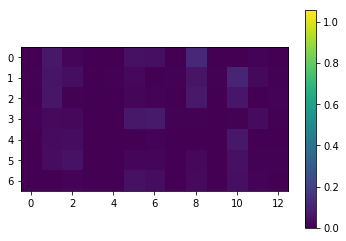

In [9]:
# Evaluate how much the other explanations changed

deltas_original = np.load("../Heart/deltas.npy")

print(np.round(deltas_original, 2))
print(np.round(deltas[:num_clusters - 2, ], 2))

diff = np.abs(deltas_original - deltas[:num_clusters - 2, ])

import matplotlib.pyplot as plt

plt.imshow(diff, vmin = 0.0, vmax = np.max(np.abs(deltas_original)))
plt.colorbar()
plt.show()
plt.close()